# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns

## Load the Data

In [34]:
df = pd.read_csv('/content/drive/My Drive/Week3_task/Datasets/Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [35]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [36]:
df.shape

(52000, 30)

In [37]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


In [38]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [39]:
df.describe(include='object')

,Accident_Index,Date,Time,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
count,52000,52000,51998,51999,51999,51993,51989,51999,51999,51999,51999,51959
unique,38979,366,1420,103,6,3,6,5,9,6,2,14821
top,2.01E+12,21/10/2005,17:30,E10000017,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes,E01000004
freq,13022,249,501,2237,39351,51768,42824,37477,42490,36605,40976,138


In [40]:
df.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [42]:
corr_d = df.select_dtypes(include='number')
corr = corr_d.corr()

corr

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Unnamed: 0,1.000000,-0.374433,0.398196,-0.356891,0.400555,0.912474,-0.022030,0.023183,0.088817,-0.002406,0.937238,0.079924,0.116522,0.267424,-0.070806,0.054352,0.298120,NaN
Location_Easting_OSGR,-0.374433,1.000000,-0.633997,0.999684,-0.636494,-0.198345,0.008382,-0.030220,-0.105087,-0.000810,-0.305310,-0.065451,-0.170749,-0.157091,0.010277,-0.090091,-0.196423,NaN
Location_Northing_OSGR,0.398196,-0.633997,1.000000,-0.620424,0.999990,0.234283,-0.023492,0.012908,0.108987,0.005154,0.319681,0.084813,0.098918,0.225677,-0.030674,0.057853,0.288584,NaN
Longitude,-0.356891,0.999684,-0.620424,1.000000,-0.622917,-0.182821,0.007775,-0.030148,-0.103422,-0.000810,-0.288771,-0.063275,-0.170225,-0.152030,0.009284,-0.089642,-0.190700,NaN
Latitude,0.400555,-0.636494,0.999990,-0.622917,1.000000,0.236209,-0.023413,0.013053,0.109164,0.005141,0.321934,0.084897,0.099660,0.225908,-0.030684,0.058241,0.288699,NaN
Police_Force,0.912474,-0.198345,0.234283,-0.182821,0.236209,1.000000,-0.020003,0.011275,0.062974,-0.004910,0.975197,0.061989,0.093284,0.230404,-0.070299,0.042539,0.261269,NaN
Accident_Severity,-0.022030,0.008382,-0.023492,0.007775,-0.023413,-0.020003,1.000000,0.088587,-0.097488,0.001900,-0.018471,0.008762,-0.001492,-0.077871,0.075116,0.037459,-0.082424,NaN
Number_of_Vehicles,0.023183,-0.030220,0.012908,-0.030148,0.013053,0.011275,0.088587,1.000000,0.235927,-0.009176,0.014645,-0.132285,0.008153,0.101117,0.052445,0.014741,0.054241,NaN
Number_of_Casualties,0.088817,-0.105087,0.108987,-0.103422,0.109164,0.062974,-0.097488,0.235927,1.000000,0.008890,0.074158,-0.076962,0.024625,0.152804,-0.026670,0.013125,0.133392,NaN
Day_of_Week,-0.002406,-0.000810,0.005154,-0.000810,0.005141,-0.004910,0.001900,-0.009176,0.008890,1.000000,-0.004325,0.003716,0.003906,-0.019566,0.011289,-0.000486,-0.021585,NaN


In [43]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [44]:
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

<Axes: >

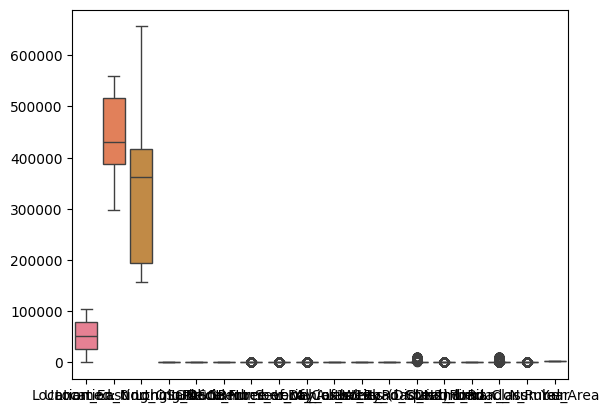

In [45]:
sns.boxplot(df)

In [46]:
# remove_outliers()

In [47]:
for col in df.columns:
  print(f'col name: {col}, number of nulls: {df[col].isnull().sum()}, col type: {df[col].dtype}, values: {df[col].unique()}')

  print('-'*75)

col name: Unnamed: 0, number of nulls: 0, col type: int64, values: [88245 78422 19574 ...   437 61353 75359]
---------------------------------------------------------------------------
col name: Accident_Index, number of nulls: 0, col type: object, values: ['2.01E+12' '200520D303703' '200501TX20137' ... '20053102C2156'
 '200501BS70452' '2005160D02810']
---------------------------------------------------------------------------
col name: Location_Easting_OSGR, number of nulls: 0, col type: float64, values: [381880. 413520. 516260. ... 460040. 511930. 509970.]
---------------------------------------------------------------------------
col name: Location_Northing_OSGR, number of nulls: 0, col type: float64, values: [298700. 284740. 177370. ... 452300. 245160. 515740.]
---------------------------------------------------------------------------
col name: Longitude, number of nulls: 0, col type: float64, values: [-2.268891 -1.802453 -0.327073 ... -0.178465 -1.591972 -0.334114]
--------------

In [48]:
# df['Number_of_Vehicles'] = df.groupby('Accident_Severity', 'Number_of_Casualties')['Number_of_Vehicles'].transform()

In [49]:
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mode)
df['Day_of_Week'] = df['Day_of_Week'].fillna(df['Day_of_Week'].mode)
df['Speed_limit'] = df['Speed_limit'].fillna(df['Speed_limit'].mode)
df['LSOA_of_Accident_Location'] = df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'].mode)

In [50]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [51]:
df.dropna(inplace=True)

In [52]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [54]:
df.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,object
Number_of_Casualties,int64


In [61]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [84]:
df['Local_Authority_(Highway)'] = df['Local_Authority_(Highway)'].str.replace('E','')
df['LSOA_of_Accident_Location'] = df['LSOA_of_Accident_Location'].str.replace('E','')

In [96]:
df.drop('Unnamed: 0', axis=1)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,24/04/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,01029654,2005.0
1,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,08/10/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,01009313,2005.0
2,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,02/04/2005,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,01002678,2005.0
3,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,26/05/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,01008924,2005.0
4,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,11/01/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,01029416,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,10/11/2005,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,01012363,2005.0
51996,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,17/08/2005,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,01028141,2005.0
51997,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,22/08/2005,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,01002840,2005.0
51998,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,18/12/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,01027681,2005.0


In [97]:
for col in df.columns:
  print(f'col name: {col}, number of nulls: {df[col].isnull().sum()}, col type: {df[col].dtype}, values: {df[col].unique()}')
  print('-'*75)

col name: Unnamed: 0, number of nulls: 0, col type: int64, values: [88245 78422 19574 ...   437 61353 75359]
---------------------------------------------------------------------------
col name: Accident_Index, number of nulls: 0, col type: object, values: ['2.01E+12' '200520D303703' '200501TX20137' ... '20053102C2156'
 '200501BS70452' '2005160D02810']
---------------------------------------------------------------------------
col name: Location_Easting_OSGR, number of nulls: 0, col type: float64, values: [381880. 413520. 516260. ... 460040. 511930. 509970.]
---------------------------------------------------------------------------
col name: Location_Northing_OSGR, number of nulls: 0, col type: float64, values: [298700. 284740. 177370. ... 452300. 245160. 515740.]
---------------------------------------------------------------------------
col name: Longitude, number of nulls: 0, col type: float64, values: [-2.268891 -1.802453 -0.327073 ... -0.178465 -1.591972 -0.334114]
--------------

In [133]:
chosed= df[[
       'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Casualties',
       'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type',  '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year']]

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in chosed.select_dtypes(include='object').columns:
  chosed[col] = le.fit_transform(x[col])

<ipython-input-134-39478afbdd93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosed[col] = le.fit_transform(x[col])
<ipython-input-134-39478afbdd93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosed[col] = le.fit_transform(x[col])
<ipython-input-134-39478afbdd93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [135]:
from sklearn.decomposition import PCA

In [136]:
pca = PCA(n_components=2)
pca.fit(chosed)

PCA(n_components=2)

In [137]:
x_pca = pca.transform(chosed)
pca_col = ['PC{}'.format(i) for i in range(1, len(pca.components_)+1)]
pca_df = pd.DataFrame(x_pca, columns=pca_col)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [138]:
pca_df

,PC1,PC2
0,-13218.988987,69114.107514
1,-38892.655035,45729.140198
2,-178659.231074,-4984.576560
3,-36004.041817,57574.454239
4,-9199.800227,23755.652333
...,...,...
51979,166675.683708,-60639.823119
51980,-3199.707439,-10532.967974
51981,-182657.885515,-14478.668374
51982,119591.074569,-38583.577452


In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca_df_scaled = scaler.fit_transform(pca_df)
pca_df_scaled = pd.DataFrame(pca_df_scaled, columns = pca_df.columns)

In [140]:
pca_df_scaled

,PC1,PC2
0,-0.105970,1.443540
1,-0.311782,0.955114
2,-1.432215,-0.104109
3,-0.288625,1.202519
4,-0.073750,0.496168
...,...,...
51979,1.336150,-1.266543
51980,-0.025650,-0.219995
51981,-1.464271,-0.302406
51982,0.958698,-0.805869


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [126]:
from sklearn.cluster import KMeans
import numpy as np

In [161]:
from sklearn.metrics import silhouette_score

n_clus = []
s_pred = []

for i in range(2,11):
  km = KMeans(n_clusters=i)
  km.fit(pca_df_scaled)
  km_predict = km.predict(pca_df_scaled)
  n_clus.append(i)
  s_pred.append(silhouette_score(pca_df_scaled, km_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [162]:
el_cl = {'n_clus': n_clus, 's_pred': s_pred}
elbow_df = pd.DataFrame(data=el_cl)

In [163]:
elbow_df

,n_clus,s_pred
0,2,0.472022
1,3,0.590051
2,4,0.563766
3,5,0.571839
4,6,0.587701
5,7,0.588551
6,8,0.589393
7,9,0.566769
8,10,0.578738


In [169]:
import matplotlib.pyplot as plt

<Axes: xlabel='s_pred', ylabel='n_clus'>

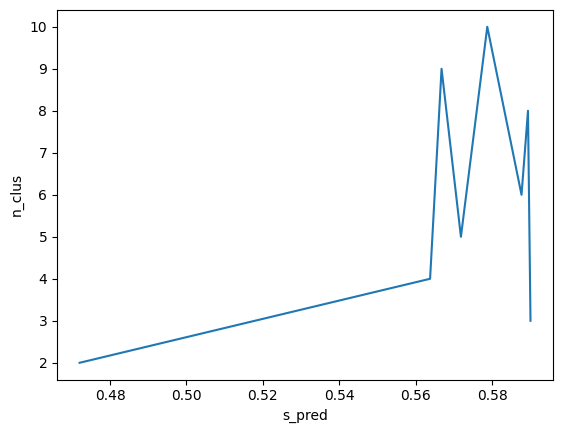

In [182]:
sns.lineplot(data=elbow_df, x="s_pred", y="n_clus")

In [145]:
km4 = KMeans(n_clusters=4)
km4.fit(pca_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [150]:
km4_predict = km4.predict(pca_df_scaled)

In [186]:
from sklearn.metrics import silhouette_score
print('silhouette_score for 4 clusters: ', silhouette_score(pca_df_scaled, km4_predict))

silhouette_score for 4 clusters:  0.5643875628891744


## Plot the data points with their predicted cluster center

In [188]:
pca_df_scaled['cluster'] = km4.labels_

In [189]:
pca_df_scaled

,PC1,PC2,cluster
0,-0.105970,1.443540,2
1,-0.311782,0.955114,2
2,-1.432215,-0.104109,1
3,-0.288625,1.202519,2
4,-0.073750,0.496168,2
...,...,...,...
51979,1.336150,-1.266543,3
51980,-0.025650,-0.219995,0
51981,-1.464271,-0.302406,1
51982,0.958698,-0.805869,0


<Axes: xlabel='PC1', ylabel='PC2'>

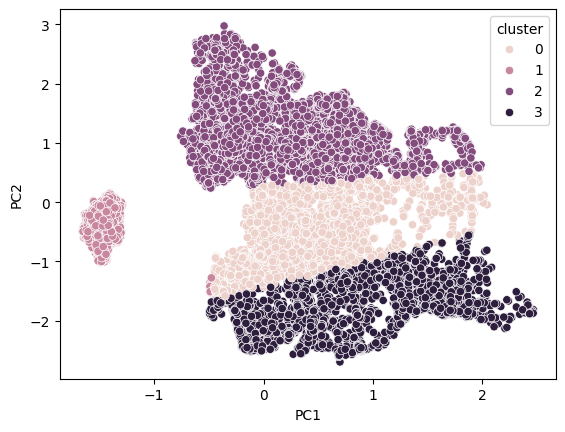

In [190]:
sns.scatterplot(data=pca_df_scaled, x='PC1', y='PC2', hue='cluster' )

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

i chosed(
       'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Casualties',
       'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type',  '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year') because these are the important for our model unlike features like time

i choosed clusters based on elbow methos

i used silhouette_score for model Evaluation